<a href="https://colab.research.google.com/github/tusker4/Sesac_Saltlux_DeepLearning/blob/main/5_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EA%B8%B0%EC%B4%88_pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요
- 파이토치
  - 페이스북 + 뉴욕대
  - 개방형, 점유율 2위
    - 소스코드 공개, 자유개발 허용, 상업적이용허용 => LLM 발생
  - 개발 스타일
    - 객체지향적
  - 특징
    - Define By Run
  - 선호분야
    - R&D
      - 자체 솔루션 구축하는 회사
      - 국책 연구소



In [27]:
import torch
# pyTorch.org 방문 => 자동으로 접속 PC점검

# 개발 버전과 배포/운영  버전이 동일 => 도커등 컨테이너 방식이 선호
torch.__version__

'2.1.0+cu118'

In [28]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# GPU 사용

In [29]:
torch.cuda.is_available()

False

In [30]:
# 현재 환경의 토치의 gpu 지원 여부에 따라 자동 세팅 -> 상수정의
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )
DEVICE

device(type='cpu')

- 텐서(파이토치의 자료구조)마다 GPU설정 가능
- 전체 적용가능, 개별적용가능


# 텐서, Tensor
- 자료구조
  - python
    - 수치형,문자열, 블린
    - 연속형-리스트, 튜플, 딕셔너리, 집합
  - numpy
    - ndarray
  - pandas
    - Series, DataFrame
  - Tensorflow, pyTorch
    - Tensor
      - base는 ndarray를 근간으로 사용
    - numpy가 베이스이다.

- 특징
  - 텐서는 행렬이다.
  - 행렬 연산을 이해하면, 쉽게 사용 가능
  - 딥러닝 연산의 기본은 텐서
  


In [31]:
from IPython.display import Image

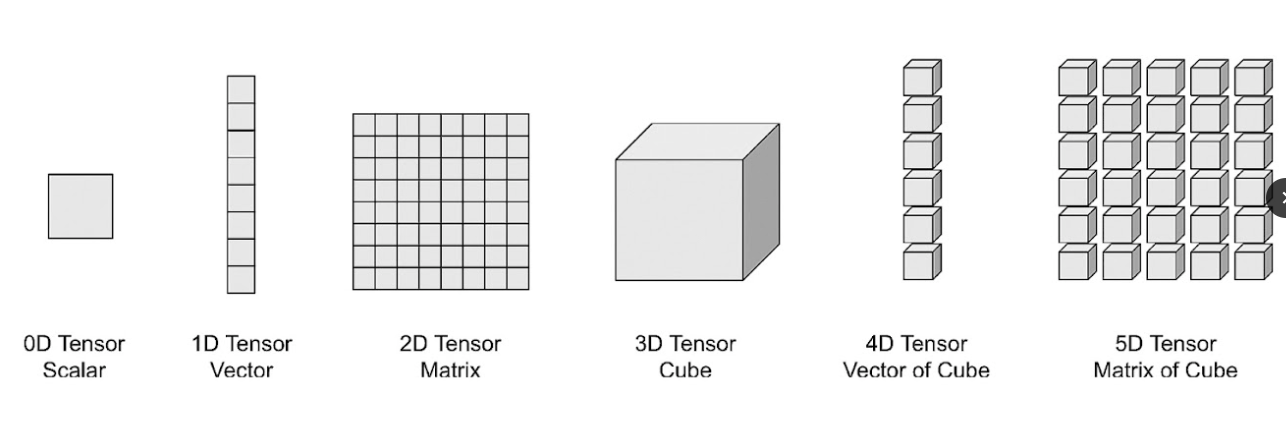

In [32]:
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/img/텐서스타일.png')

# 토치 난수 고정
- 난수 시드 고정
  - 항상 같은 패턴으로 난수가 발생(변수를 제거), 재현성 높임.
  - os레벨, 파이썬레벨, numpy레벨, 딥러닝 프레임웍 레벨 모두 고정

In [33]:
torch.manual_seed(1024)

# 텐서 생성
- 리스트, 배열, 난수, 멤버가 모두 0 or 1, shape 카피해서 생성

In [34]:
# 리스트로부터
list_src = [
    [1,2,3],
    [4,5,6]
]


x = torch.Tensor( list_src )
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [35]:
# 텐서 ->  리스트 추출가능하지만 , 타입이 변경
x.tolist()

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

In [36]:
# 배열로 부터 생성
import numpy as np
import pandas as pd

arr = np.arange(16).reshape(4,4)
arr

x = torch.Tensor(arr)
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])

In [37]:
# 배열 추출
x.numpy()

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]], dtype=float32)

In [38]:
# 난수로 부터 생성
# low <= n < high
torch.randint(0, 5, size=(2,3))

tensor([[2, 1, 1],
        [4, 0, 1]])

In [39]:
# 특수한 형태/값을 가진 텐서 생성
torch.zeros(2,2)


tensor([[0., 0.],
        [0., 0.]])

In [40]:
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [41]:
# 특정 텐서 x의 형태를 카피해서 멤버를 모두 1
torch.ones_like(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

- ★ 학습에 필요한 데이터는 반드시 **텐서로 바꿔서** 학습에 사용한다.


------


# 텐서 타입

- 데이터에 맞춰서 타입을 정교하게 맞추면 학습비용이 절감된다.
- 특정 타입의 텐서를 직접 만들 수 있있다.
  - FloatTensor

In [ ]:
Image(' ')

# 텐서의 조작 및 연산
- 텐서 생성(획득)후 체크할 기본사항
  - 모양 : shape, size()
  - 차원 : ndim, dim()
  - 타입 : dtype, type()
  - numpy에서 지원하는 대부분의 기능을 함수형태로 wraping해서 지원한다

In [43]:
x = torch.randint(0, 10, size=(2,3,4))
x

tensor([[[1, 8, 9, 6],
         [5, 4, 8, 7],
         [4, 9, 3, 1]],

        [[3, 9, 2, 3],
         [3, 9, 8, 7],
         [9, 5, 1, 0]]])

In [47]:
# 모양 , 차원, 타입
x.shape, x.ndim, x.dim(), x.dtype, x.type()

(torch.Size([2, 3, 4]), 3, 3, torch.int64, 'torch.LongTensor')

# 인덱싱, 슬라이싱
  - indexing : 차원축소
  - slicing : 차원 유지
  

In [50]:
# 인덱싱 -> 기존과 동일
x[0], x[0].size(), x[-1]

(tensor([[1, 8, 9, 6],
         [5, 4, 8, 7],
         [4, 9, 3, 1]]),
 torch.Size([3, 4]),
 tensor([[3, 9, 2, 3],
         [3, 9, 8, 7],
         [9, 5, 1, 0]]))

In [54]:
#  인덱싱 응용(표현적)
# 스칼라를 뽑고 싶으면 => 차원별로 나열, => 좌표찍기

x[0][0][0], x[0,0,0]

(tensor(1), tensor(1))

In [55]:
# 슬라이싱
x[:]  # 전체자체를 카피
x[:].size()

torch.Size([2, 3, 4])

In [57]:
# 슬라이싱 으용
x[1, :, :] = 0
x

tensor([[[1, 8, 9, 6],
         [5, 4, 8, 7],
         [4, 9, 3, 1]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

## View
- numpy의 reshape
- 차원변경
- 데이터(원소)의 순서는 동일하게 유지
  - 차원 변경 전 후

## transpose
- 차원의 맞교환
  - (2,3,4) => (3,2,4), ...
- 원소의 순서가 바뀐다.

In [60]:
x = torch.randint(0, 10, size=(2,3,4))
x

tensor([[[6, 8, 7, 0],
         [1, 6, 8, 9],
         [1, 1, 4, 1]],

        [[8, 3, 8, 5],
         [0, 1, 4, 6],
         [3, 9, 5, 4]]])

In [61]:
# 차원을 모두 곱한 값이 원본값과 동일해야한다.
x.view(2,2, 6)

tensor([[[6, 8, 7, 0, 1, 6],
         [8, 9, 1, 1, 4, 1]],

        [[8, 3, 8, 5, 0, 1],
         [4, 6, 3, 9, 5, 4]]])

In [62]:
x.reshape(2,3,4)

tensor([[[6, 8, 7, 0],
         [1, 6, 8, 9],
         [1, 1, 4, 1]],

        [[8, 3, 8, 5],
         [0, 1, 4, 6],
         [3, 9, 5, 4]]])

In [63]:
# 데이터의 개수를 모른다면 : -1
x.reshape(-1, 12)

tensor([[6, 8, 7, 0, 1, 6, 8, 9, 1, 1, 4, 1],
        [8, 3, 8, 5, 0, 1, 4, 6, 3, 9, 5, 4]])

- transpose

In [66]:
x.size()

torch.Size([2, 3, 4])

In [65]:
# 0번째와 1번째 값을 transpose

In [68]:
x.transpose(0, 1), x.transpose(0, 1).size()

(tensor([[[6, 8, 7, 0],
          [8, 3, 8, 5]],
 
         [[1, 6, 8, 9],
          [0, 1, 4, 6]],
 
         [[1, 1, 4, 1],
          [3, 9, 5, 4]]]),
 torch.Size([3, 2, 4]))

## squeeze, unsqueeze
- squeeze : 차원값이 1인 차원을 제거
- unsqueeze : 차원값이 1인 차원을 추가


In [73]:
x = torch.rand((3,1,2,4,1))
x.size(), x


(torch.Size([3, 1, 2, 4, 1]),
 tensor([[[[[0.6378],
            [0.7754],
            [0.2238],
            [0.2815]],
 
           [[0.2565],
            [0.4150],
            [0.5494],
            [0.9508]]]],
 
 
 
         [[[[0.7733],
            [0.0173],
            [0.8943],
            [0.9305]],
 
           [[0.1506],
            [0.4694],
            [0.6687],
            [0.8338]]]],
 
 
 
         [[[[0.1054],
            [0.6227],
            [0.6268],
            [0.2372]],
 
           [[0.8549],
            [0.1365],
            [0.2590],
            [0.7750]]]]]))

In [76]:
tmp = x.squeeze()
tmp.size()

torch.Size([3, 2, 4])

In [78]:
tmp.unsqueeze(2).size() # 2번째 자리에 1을 넣어서 차원을 증가하고 싶엇

torch.Size([3, 2, 1, 4])

# cat, stack

- cat  : 단순텐서 합치기
- stack : 텐서 쌓기

In [79]:
a = torch.rand((2,3))
b = torch.rand((2,3))
a.size(), b.size()

(torch.Size([2, 3]), torch.Size([2, 3]))

In [82]:
# 단순합치기
# dim = 0 => 1차원 합치기
tmp = torch.cat([a, b] , dim=0)
tmp.size()

torch.Size([4, 3])

In [83]:
# 단순합치기
# dim = 0 => 1차원 합치기
tmp = torch.cat([a, b] , dim=1)
tmp.size()

torch.Size([2, 6])

# 쌓는다.
- 쌓는다.


In [85]:
# size는 동일하게 구성, 묶여진 형태가 dim=1 기준으로 묶였다.
tmp = torch.stack([a, b], dim =1 )
tmp.size()

torch.Size([2, 2, 3])

## 텐서의 기초연산

## 기본 사칙연산
+,-,
- 같은 자리에 있는 원소끼리 연산했다.
- 현재 기준을 동일한 size를 가진 텐서끼리ㅣ 연산



In [89]:
# (2,3) (2,3)
x = torch.Tensor([[ 1,2,3,], [4,5,6]])
y = torch.Tensor([[ 10,20,30,], [40,50,60]])

In [90]:
# 행렬의 합
x+y, x.add(y)

(tensor([[11., 22., 33.],
         [44., 55., 66.]]),
 tensor([[11., 22., 33.],
         [44., 55., 66.]]))

In [92]:
# 행렬의 곱셈, 나눗셈
x * y, x.mul(y)

(tensor([[ 10.,  40.,  90.],
         [160., 250., 360.]]),
 tensor([[ 10.,  40.,  90.],
         [160., 250., 360.]]))

In [94]:
x/y, x.div(y)

(tensor([[0.1000, 0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000]]),
 tensor([[0.1000, 0.1000, 0.1000],
         [0.1000, 0.1000, 0.1000]]))

In [95]:
# size가 다른 텐서간 연산
z = torch.Tensor([10])
z.size()

torch.Size([1])

In [97]:
# 행렬의 합 (매트릭스 + 스칼라)
x + 10

tensor([[11., 12., 13.],
        [14., 15., 16.]])

In [96]:
# (2,3), (1,) z는 스칼라가 아닌데 모든 원소에 가서 일일히 연산을 수행했다
# 브로드케스팅이 작동했다 (numpy부터 지원)
# 모양이 다르면 연산이 가능하게  stretch 처리
# y= wx + b 에서 이렇게 작동
x + z

tensor([[11., 12., 13.],
        [14., 15., 16.]])

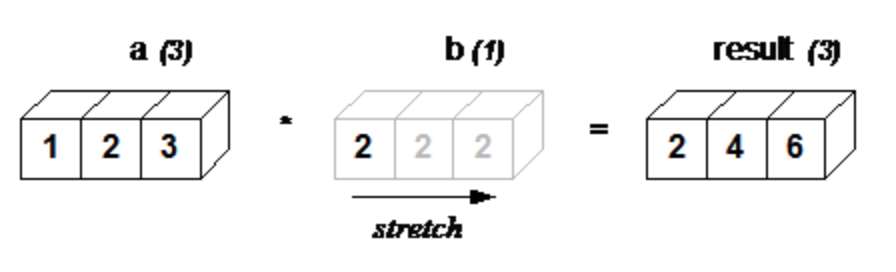

In [99]:
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/img/토치_002_브로드케스팅1.png')

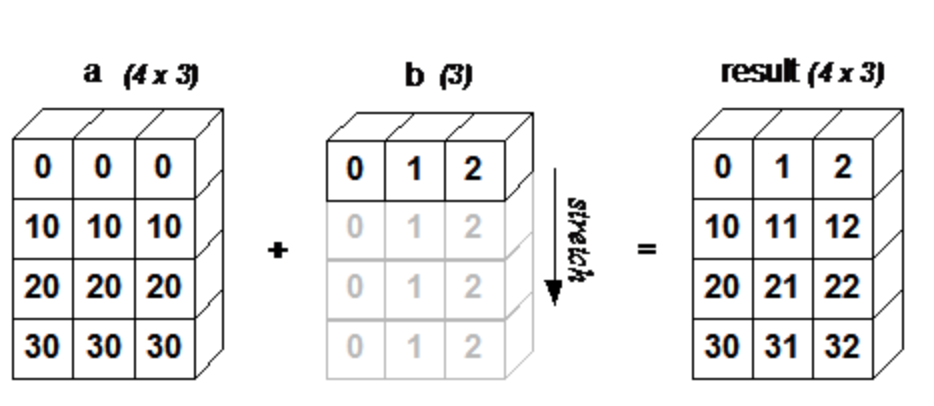

In [100]:
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/img/토치_002_브로드케스팅2.png')

In [ ]:
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/img/토치_002_브로드케스팅1.png')

# (4,1) + (1,3) = (4, 3) 가능 0


- 행률의 곱, 제거

In [103]:
x  = torch.Tensor([1,2,3])
y = torch.Tensor([4,5,6])
x,y

(tensor([1., 2., 3.]), tensor([4., 5., 6.]))

In [105]:
x * y # 간단한 곱

tensor([ 4., 10., 18.])

In [106]:
#  백터 내적 -> 두 백터사이의 유사도를 측정할 때 사용 => 자연어에서 유사도 검사 활용
# => 챗봇 : 질문 => 유사한 질문을 찾아서 답변, 원문 => 기계번역, 유사도 높은 답 => 답
# 32 = 1*4+ 2*5+ 3*6 = 32
torch.dot(x,y)  # 내적

tensor(32.)

In [107]:
# 2차원 ㄷ이터 준비
x = torch.Tensor([
                  [1,3],
                  [2,3],
                  [5,6]
                  ])
x.size()

torch.Size([3, 2])

In [109]:
y = torch.Tensor([
    [7,8],
    [9,10]
])
y.size()

torch.Size([2, 2])

In [113]:
# x * y # error
# mm : matrix multiple : 행렬의 곱

tmp = torch.mm(x,y)
tmp.size(), tmp

'''
  tensor([[ 34.,  38.],
        [ 41.,  46.],
        [ 89., 100.]])
        34 = 1*7+ 3*9, 38 = 1*8 + 3*10
'''

tensor([[ 34.,  38.],
        [ 41.,  46.],
        [ 89., 100.]])